In [2]:
import os
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from omnixai.data.tabular import Tabular

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
train = pd.read_csv('../data/current-dataset/train-feature-customsplit.csv', delimiter=",",index_col=0)
test = pd.read_csv('../data/current-dataset/test-feature-customsplit.csv', delimiter=",",index_col=0)
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(X_train.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train.label.copy())
class_names = label_encoder.classes_

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = rf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Bike       0.65      0.61      0.63       485
         Bus       0.82      0.86      0.84      3961
         Car       0.96      0.89      0.92      4264
       Metro       0.91      0.76      0.83      4612
        Moto       0.80      0.87      0.83       508
         Run       0.97      0.98      0.97       715
  Stationary       0.69      0.89      0.78       950
       Train       0.06      0.62      0.12        84
        Tram       0.89      0.84      0.86      2769
        Walk       0.88      0.86      0.87      2795
      e-Bike       0.37      0.97      0.53        29
   e-Scooter       0.77      0.80      0.79       650

    accuracy                           0.84     21822
   macro avg       0.73      0.83      0.75     21822
weighted avg       0.87      0.84      0.85     21822



In [16]:
sklearn.set_config(print_changed_only=False)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

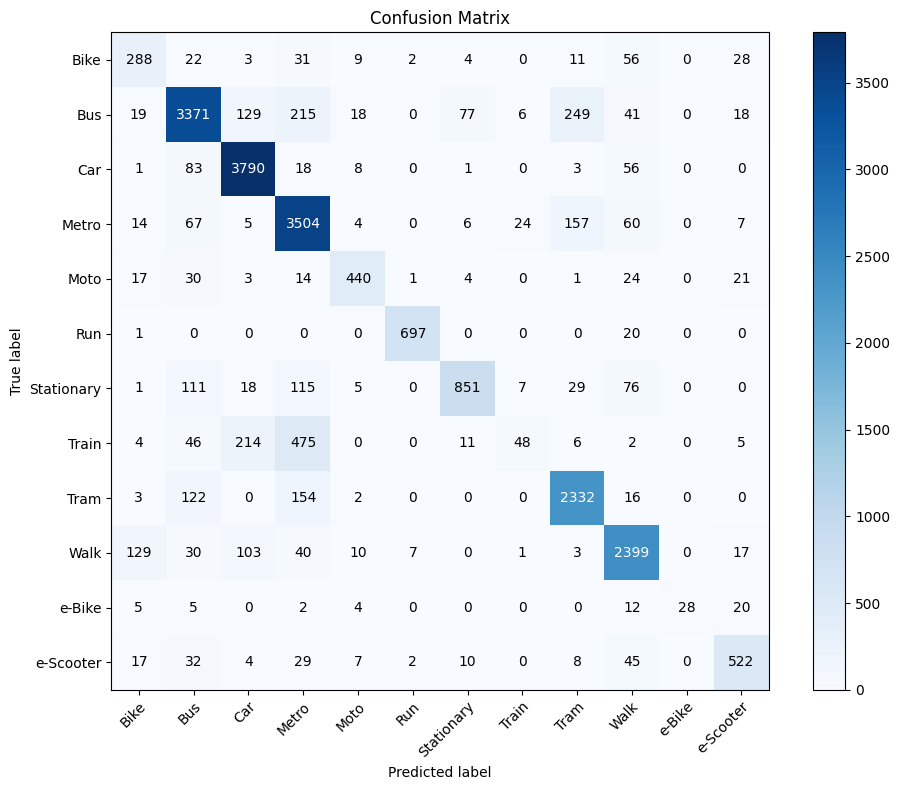

In [7]:
import sys  
sys.path.insert(0, '../../src/')
import metrics as mt
mt.plot_confusion_matrix(y_test,y_pred)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 15, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy"],
    'bootstrap': [True, False]
}

# RandomForest model
rfc = RandomForestClassifier()

# Random search with cross-validation
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=5, cv=3, verbose=2, n_jobs=-1)
random_search.fit(X_train,y_train)

# Best parameters and model
best_rf = random_search.best_estimator_

# Validate the performance
y_predi = best_rf.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

              precision    recall  f1-score   support

        Bike       0.61      0.53      0.57       518
         Bus       0.82      0.86      0.84      3910
         Car       0.96      0.89      0.92      4275
       Metro       0.91      0.76      0.83      4613
        Moto       0.77      0.89      0.83       485
         Run       0.97      0.98      0.98       711
  Stationary       0.70      0.89      0.78       954
       Train       0.06      0.64      0.11        76
        Tram       0.89      0.83      0.86      2812
        Walk       0.86      0.84      0.85      2780
      e-Bike       0.33      1.00      0.50        25
   e-Scooter       0.78      0.79      0.79       663

    accuracy                           0.83     21822
   macro avg       0.72      0.83      0.74     21822
weighted avg       0.87      0.83      0.85     21822



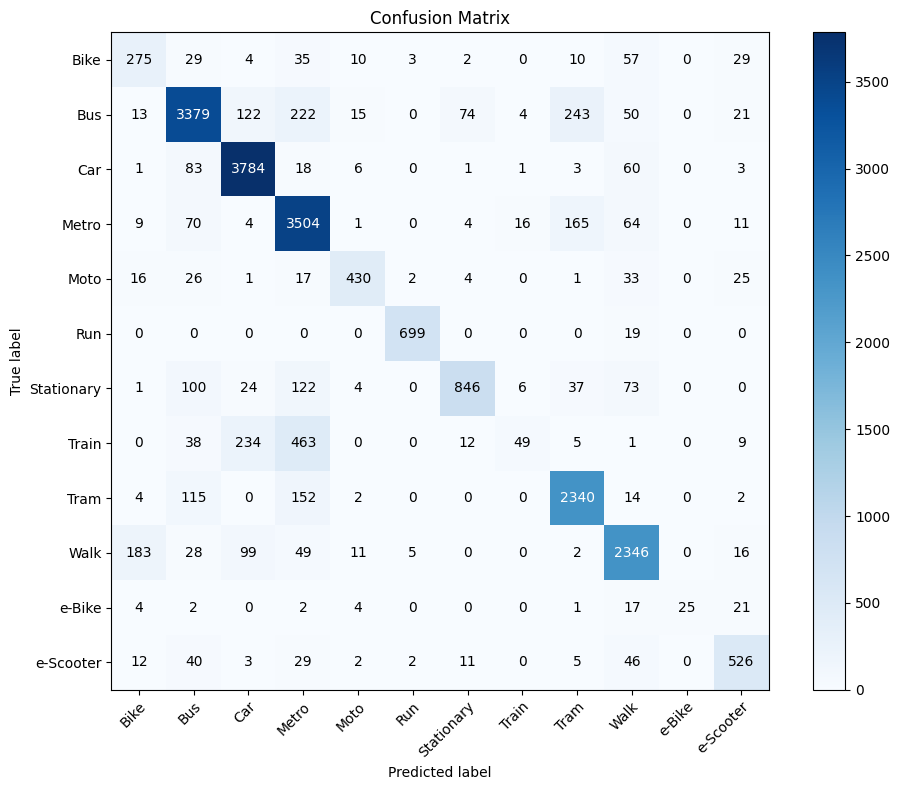

In [ ]:
import sys  
sys.path.insert(0, '../../src/')
import metrics as mt
print(classification_report(y_predi, y_test))
mt.plot_confusion_matrix(y_test,y_predi)

### OLD DATASET

In [ ]:
train_old = pd.read_csv('../data/old-dataset/train-feature-customsplit.csv', delimiter=",",index_col=0)
test_old = pd.read_csv('../data/old-dataset/test-feature-customsplit.csv', delimiter=",",index_col=0)
X_train_old = train_old.drop(columns='label')
y_train_old = train_old['label']
X_test_old = test_old.drop(columns='label')
y_test_old = test_old['label']

In [ ]:
rf_old = RandomForestClassifier()
rf_old.fit(X_train_old,y_train_old)

# Predict on the test data and evaluate the model
y_pred_old = rf_old.predict(X_test_old)

print(classification_report(y_pred_old, y_test_old))

              precision    recall  f1-score   support

        Bike       0.36      1.00      0.53        10
         Bus       0.90      0.61      0.73      5967
         Car       0.61      0.95      0.74      2569
       Metro       0.95      0.84      0.89      4289
        Moto       0.03      0.24      0.06        25
         Run       0.99      0.98      0.99       486
  Stationary       0.19      0.72      0.30       269
       Train       0.70      0.91      0.79       536
        Tram       0.82      0.76      0.79      2351
        Walk       0.90      0.91      0.91      2205
      e-Bike       0.32      0.94      0.48        17
   e-Scooter       0.78      0.75      0.76       512

    accuracy                           0.78     19236
   macro avg       0.63      0.80      0.66     19236
weighted avg       0.84      0.78      0.80     19236



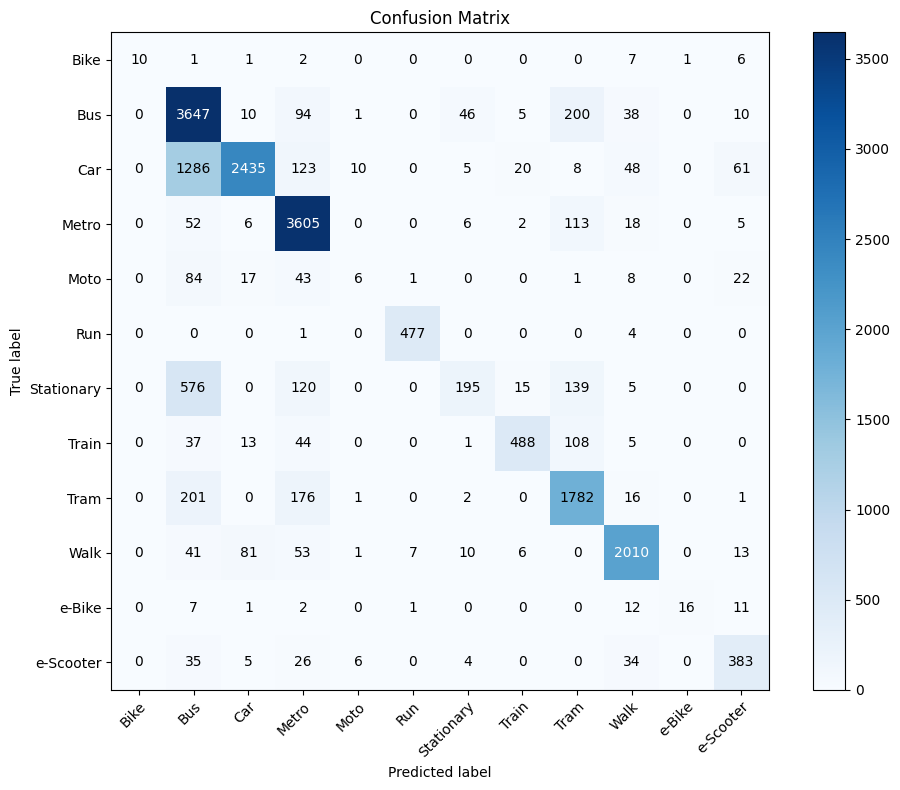

In [ ]:
mt.plot_confusion_matrix(y_test_old,y_pred_old)